In [7]:
#Karime Monzerrat Muñoz Franco - A01638587
#base de datos de https://www.kaggle.com/datasets/timmofeyy/hourly-earnings-of-female-and-male-employees?resource=download
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df1 = pd.read_csv('pagos.csv')
df2 = pd.read_csv('paises.csv')

In [ ]:
print (df1.head())
print (df2.head())

In [9]:
merged_df = pd.merge(df1, df2, left_on='country_id', right_on='country-code', how='left')

In [10]:
merged_df.to_csv('resultados_merge.csv', index=False)
merged_df = merged_df.drop(columns=['country_id','gender_code','country-code','alpha-3','alpha-2','Unnamed: 0_x','Unnamed: 0_y'])

In [ ]:
print (merged_df.head())

In [12]:
group_gender_pay= merged_df.groupby('gender')['amount_local_currency']

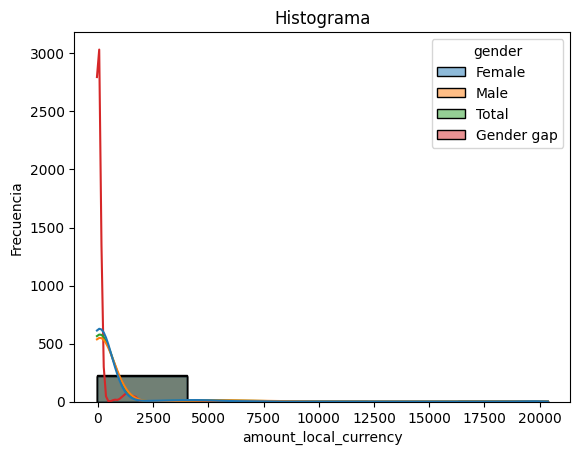

In [26]:
# histogramas
fig=plt.figure ()
sns.histplot(data=merged_df, x='amount_local_currency' , hue="gender",bins=5, kde=True)

plt.xlabel("amount_local_currency")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.show()



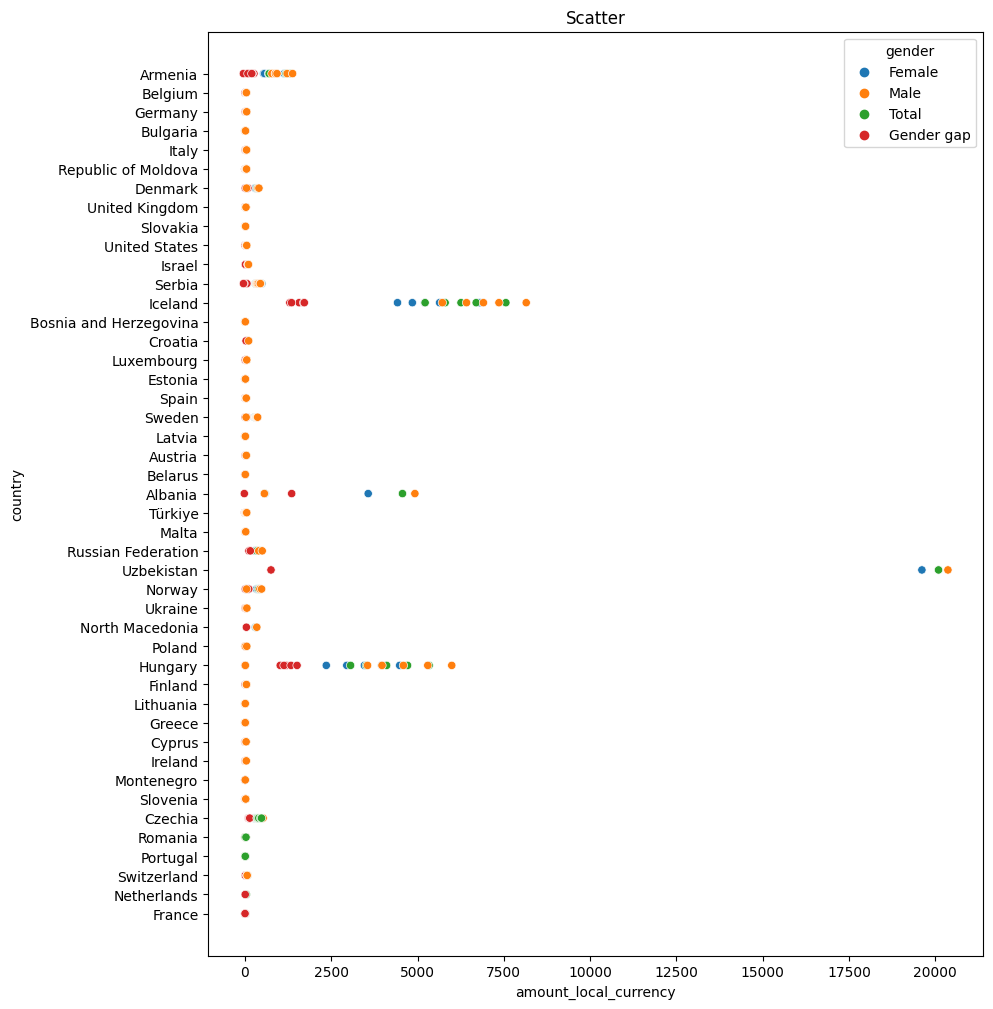

In [35]:
#scatterplot
#fig=plt.figure ()
fig = plt.figure(figsize=(10, 12))
sns.scatterplot(data=merged_df, x='amount_local_currency',y='country', hue="gender")

plt.xlabel("amount_local_currency")
plt.ylabel("country")
plt.title("Scatter")
plt.show()

<Figure size 640x480 with 0 Axes>

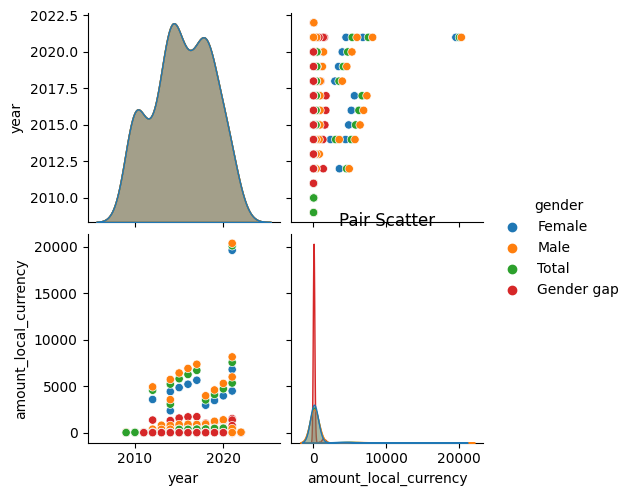

In [31]:
#pairplot
fig=plt.figure ()
sns.pairplot(data=merged_df, hue="gender")
plt.title("Pair Scatter")
plt.show()


<ipython-input-33-c24b719f2cc3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=merged_df.corr()


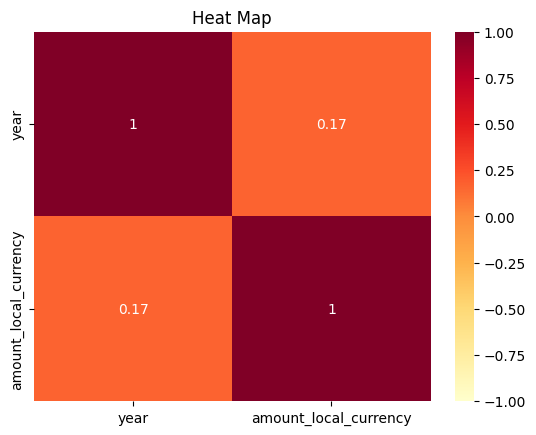

In [33]:
#mapas de calor
corr=merged_df.corr()
sns.heatmap(data=corr, vmin=-1, vmax=1, cmap="YlOrRd", annot=True)
plt.title("Heat Map")
plt.show()


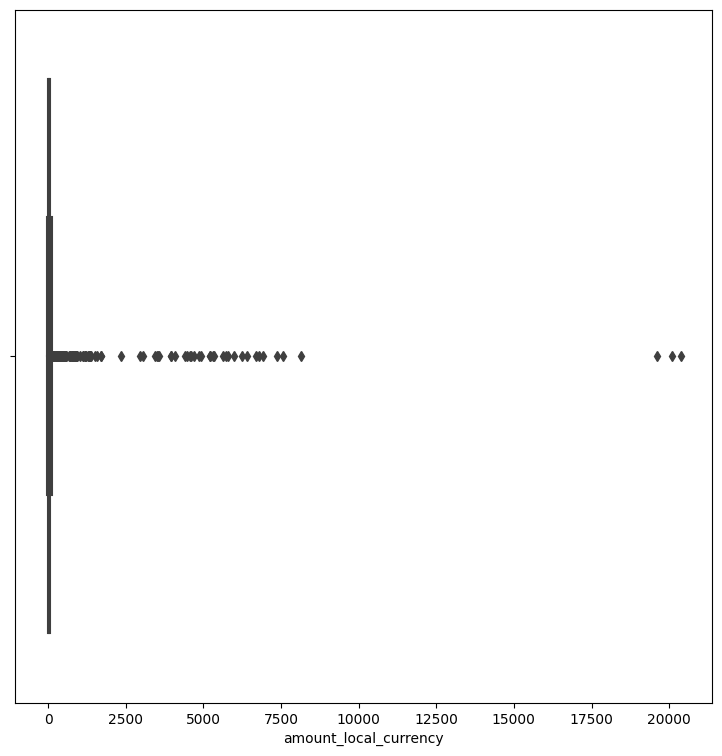

In [34]:
#box plot
fig=plt.figure(figsize=(9,9))
sns.boxplot(data=merged_df,x='amount_local_currency')
plt.show()

**¿Hay alguna variable que no aporta información?**
Unnamed: 0_x y Unnamed: 0_y porque solo eran para contabilizar filas en el excel.  

**Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?**
Cuando descargue los csv eran 2, 1 en donde estaba la información de pagos, genero, fecha y un id del país; el otro tenía el id y que país representaba. Por lo que fue útil para hacer un merge y tras esto borre las repetidas o que no aportaban como el country_id porque ya había puesto el nombre del país o gender code porque ya tenía una columna gender, otro que borre fue 'Unnamed: 0_x','Unnamed: 0_y' porque solo eran para contabilizar filas, country code que era lo mismo que country id.

**¿Existen variables que tengan datos extraños?**
No encontre ninguna variable con datos extraños.

**Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?**
Use esta misma base de datos para la entrega donde saque la varianza y la desviación estandar y note que los salarios si varían mucho entre hombres y mujeres pero de eso trata este csv.

**¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?**
Pude notar que en el blox plot casi todos los datos están en un mismo rango, pero sí hay valores fuera del grupo/rango.
Igualmente note que en en el scatter plot se mantenía un rango notorio donde los hombres ganan más que las mujeres.

